In [1]:
# importing necessary packages 
import argparse
import io
import json
import os
import argparse
import sys

from google.cloud import language
from google.cloud.language import enums
from google.cloud.language import types
import six

from google.cloud import language
import numpy
import six


In [2]:
# providing key

import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="C:\\Users\\admin\\Desktop\\google_api_key.json"

In [3]:
# function for entity extraction and storage in variables

data=[]
name=[]
salience=[]


def entities_text(text):
    """Detects entities in the text."""
    client = language.LanguageServiceClient()

    if isinstance(text, six.binary_type):
        text = text.decode('utf-8')

    # Instantiates a plain text document.
    document = types.Document(
        content=text,
        type=enums.Document.Type.PLAIN_TEXT)

    # Detects entities in the document. You can also analyze HTML with:
    #   document.type == enums.Document.Type.HTML
    entities = client.analyze_entities(document).entities


    for entity in entities:
        print('=' * 20)
        print(u'{:<16}: {}'.format('name', entity.name.lower()))
        print(u'{:<16}: {}'.format('salience', entity.salience))
        name.append(entity.name.lower())
        salience.append(entity.salience)
        
        data.append((entity.name.lower(),entity.salience))
        

In [4]:
# function call 

entities_text("""This course will introduce you to the field of computer science and the fundamentals of computer programming. Introduction to Computer Science I is specifically designed for students with no prior programming experience, and taking this course does not require a background in Computer Science. This course will touch upon a variety of fundamental topics within the field of Computer Science and will use Java, a high-level, portable, and well-constructed computer programming language developed by Sun Microsystems (now Oracle), to demonstrate those principles. We will begin with an overview of the course topics as well as a brief history of software development. We will cover basic object-oriented programming terminology and concepts such as objects, classes, inheritance, and polymorphism, as well as the fundamentals of Java, its primitive data types, relational operators, control statements, exception handling, and file input /output. By the end of the course, you should have a strong understanding of the fundamentals of Computer Science and the Java programming language. This course will lay the groundwork for a strong education in Computer Science and a successful career devoted to implementing the principles you will learn as you progress through the CS discipline.""")

name            : field
salience        : 0.16815398633480072
name            : computer science
salience        : 0.0971737876534462
name            : computer science
salience        : 0.09132783114910126
name            : course
salience        : 0.09132783114910126
name            : computer programming
salience        : 0.0870908796787262
name            : fundamentals
salience        : 0.07683032006025314
name            : introduction
salience        : 0.055795636028051376
name            : java
salience        : 0.04897989332675934
name            : students
salience        : 0.030101228505373
name            : course
salience        : 0.01978445239365101
name            : course
salience        : 0.01700102910399437
name            : topics
salience        : 0.012982776388525963
name            : programming experience
salience        : 0.011466226540505886
name            : variety
salience        : 0.011409376747906208
name            : programming
salience        : 0.010099

In [5]:
# storing in dataframe

import pandas as pd
col_name=['keyword','salience']
df=pd.DataFrame(data,columns=col_name)
df


,keyword,salience
0,field,0.168154
1,computer science,0.097174
2,computer science,0.091328
3,course,0.091328
4,computer programming,0.087091
5,fundamentals,0.076830
6,introduction,0.055796
7,java,0.048980
8,students,0.030101
9,course,0.019784


In [6]:
df1=pd.DataFrame(df.keyword.unique())
df1

,0
0,field
1,computer science
2,course
3,computer programming
4,fundamentals
5,introduction
6,java
7,students
8,topics
9,programming experience


In [ ]:
# storing in csv file

df.to_csv('keywords.csv')

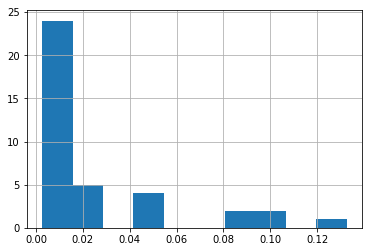

In [24]:

df.salience.hist()

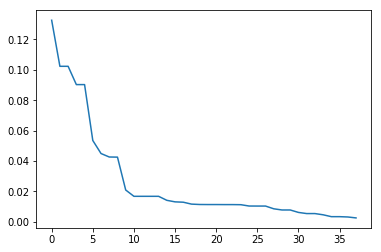

In [25]:
df.salience.plot()

In [26]:
data


[('computer algorithms', 0.1325327754020691),
 ('methods', 0.10226269066333771),
 ('course', 0.10226269066333771),
 ('fundamentals', 0.09023748338222504),
 ('practice', 0.09023748338222504),
 ('problems', 0.05351414903998375),
 ('searching algorithms', 0.04494188353419304),
 ('algorithms', 0.042657520622015),
 ('way', 0.04257160425186157),
 ('computer programs', 0.020967693999409676),
 ('input size', 0.016820205375552177),
 ('function', 0.016820205375552177),
 ('behavior', 0.016820205375552177),
 ('algorithm analysis', 0.016820205375552177),
 ('programming', 0.014188569039106369),
 ('some', 0.01317928172647953),
 ('method', 0.0129458699375391),
 ('graph algorithms', 0.011692339554429054),
 ('big-o notation', 0.011447650380432606),
 ('problem solving', 0.011407331563532352),
 ('algorithm strategies', 0.011407331563532352),
 ('divide', 0.011376154609024525),
 ('approaches', 0.011376154609024525),
 ('efficiency', 0.01130810659378767),
 ('programming paradigms', 0.010440069250762463),
 ('d

In [27]:
name

['computer algorithms',
 'methods',
 'course',
 'fundamentals',
 'practice',
 'problems',
 'searching algorithms',
 'algorithms',
 'way',
 'computer programs',
 'input size',
 'function',
 'behavior',
 'algorithm analysis',
 'programming',
 'some',
 'method',
 'graph algorithms',
 'big-o notation',
 'problem solving',
 'algorithm strategies',
 'divide',
 'approaches',
 'efficiency',
 'programming paradigms',
 'detail',
 'part',
 'problems',
 'graph theory',
 'applications',
 'course',
 'look',
 'class',
 'computers',
 'solution',
 'number',
 'np-complete',
 'introduction']

In [28]:
unique_name=set(name)
unique_name

{'algorithm analysis',
 'algorithm strategies',
 'algorithms',
 'applications',
 'approaches',
 'behavior',
 'big-o notation',
 'class',
 'computer algorithms',
 'computer programs',
 'computers',
 'course',
 'detail',
 'divide',
 'efficiency',
 'function',
 'fundamentals',
 'graph algorithms',
 'graph theory',
 'input size',
 'introduction',
 'look',
 'method',
 'methods',
 'np-complete',
 'number',
 'part',
 'practice',
 'problem solving',
 'problems',
 'programming',
 'programming paradigms',
 'searching algorithms',
 'solution',
 'some',
 'way'}